 **Author** : Romerik LOKOSSOU 

<h1><center> Exercice de Machine Learning sur l'ensemble de données Iris avec l'algorithme K nearest neighbors (KNN) </center></h1>

<h3> Le KNN est un modèle d'apprentissage automatique supervisé qui prend un point de données, examine ses « k » points de données étiquetés les plus proches et attribue l'étiquette par un vote majoritaire. </h3>

*L'ensemble de donnée Iris est un échantillon de donnée recueilli sur des fleurs. Les données sont la longueur des sépales en cm, largeur des sépales en cm, longueur des pétales en cm et largeur des pétales en cm. De cela est accompagné le type de fleur qui possède ces caractéristiques. Cette fleur peut être un iris-setosa, un iris-versicolor, ou un iris-virginica*

<img src="iris.png" width="700" height="400">

Notre analyse consistera donc à se servir de ses données pour construire un model afin de prédire plus tard à base des quatres propriétés la nature de n'importe quel fleur Iris

In [69]:
#Importations nécessaire
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [3]:
#Chargement et affichage du Dataset
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
#Notre dataset contient 150 lignes et 5 colonnes, 4 colonnes pour les caractéristiques et la dernière pour le type de l'iris
iris.shape

(150, 5)

In [6]:
#Une vue générale des statistique qu'on observe sur notre base de donnée
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Les quatre caractéristiques sont numériques, chacune avec des plages différentes. Il n'y a aucune valeur manquante dans aucune des colonnes. Par conséquent, il s'agit d'un ensemble de données propre.

array([[<AxesSubplot:title={'center':'sepal.length'}>,
        <AxesSubplot:title={'center':'sepal.width'}>],
       [<AxesSubplot:title={'center':'petal.length'}>,
        <AxesSubplot:title={'center':'petal.width'}>]], dtype=object)

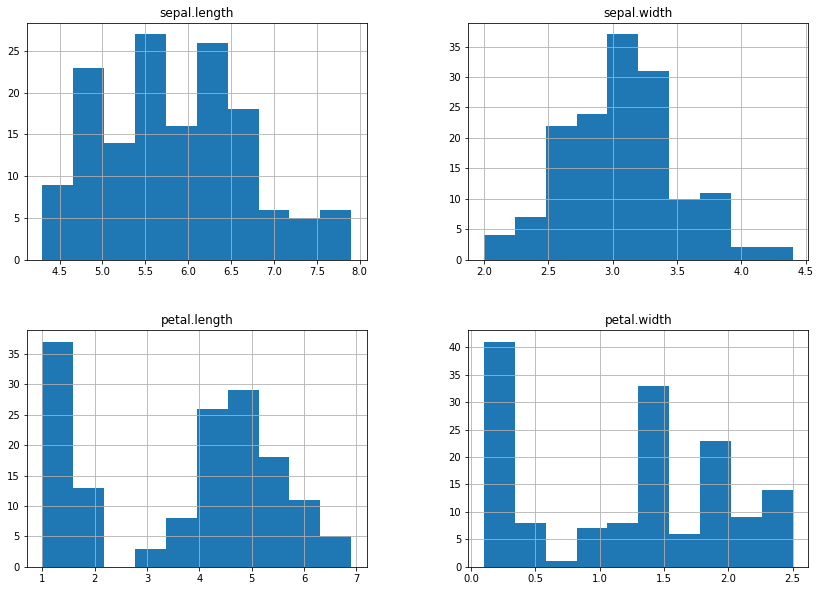

In [15]:
#Un histogramme pour voir la répartition de nos données dans chacunes des colonnes de notre échantillon de donnée
iris.hist(figsize=(14,10))

On constate que nos colonnes **sepal.width** et **sepal.lenght** présente une distribution presque complètement symétrique

Nous pouvons voir le nombre de chaque type de feuille iris présente dans notre dataset avec la méthode value_counts qu'on applique sur la colonne variety

In [16]:
iris['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

*On constate qu'on a une répartition équivalente pour chacun de nos différents types de fleur d'Iris*

Notre échantillon est donc totalement équilibré. Un échantillon non équilibré aurait une répartition pas très bien répartie des données du dataset pour chaque type

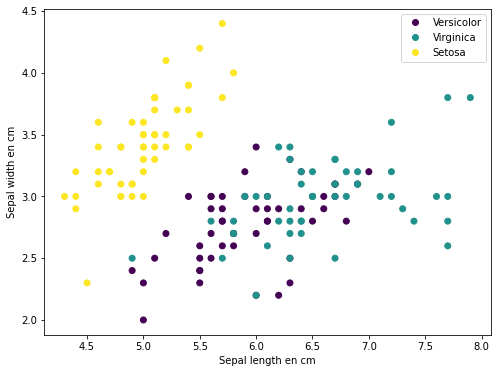

In [28]:
#Nous allons essayer d'afficher nos differents iris en se basant sur les propriétés sepal.length et sepal.width
#On coloriera chaque groupe d'iris pour pouvoir bien les distinguer

iris_type = {'Versicolor' :  0, 'Virginica': 1, 'Setosa': 2}

colors = [iris_type[i] for i in iris['variety']]

#Graphe de point
plt.figure( figsize=(8,6))
graphe = plt.scatter(iris['sepal.length'], iris['sepal.width'], c=colors)
plt.xlabel("Sepal length en cm")
plt.ylabel("Sepal width en cm")

#la légende
plt.legend(handles=graphe.legend_elements()[0], labels = iris_type.keys())

On voit qu'en utilisant les caractéristiques sepal.length et sepal.width, on arrive à clairement distingué les iris de type Setosa des deux autres qui quand à eux semble ne pas bien se distinguer l'un de l'autre


Essayons le même code avec petal.length et petal.width

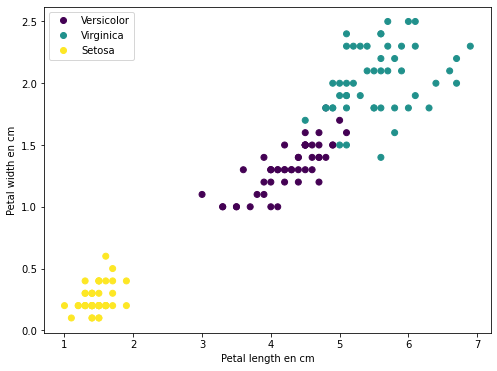

In [29]:
plt.figure( figsize=(8,6))
graphe = plt.scatter(iris['petal.length'], iris['petal.width'], c=colors)
plt.xlabel("Petal length en cm")
plt.ylabel("Petal width en cm")

#la légende
plt.legend(handles=graphe.legend_elements()[0], labels = iris_type.keys())

Les propriétés petal.length et petal.width nous donnent donc beaaucoup plus de précisions par rapport à la classification de nos iris. C'est à dire qu'il existe une correlation très forte entre ces deux propriétés

In [32]:
#Voyons cela avec la méthode corr()
iris.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<h4> Maintenant nous allons passer à la creation de notre model avec l'algorithme KNN </h4>

Dans scikit-learn, l'algorithme knn est implémenté dans le module sklearn.neighbors :

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#Preparation des données
X = iris[['petal.length', 'petal.width']]
y = iris['variety']

#Découpage de nos données en données d'entrainement du model et en données de test
X_train,  X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=45, stratify=y)

On précise stratify=y pour s'assurer que le découpage sera fait de façon proportionnelle en fonction de nos differents types de iris présents dans notre tableau y

On peut le constater avec les deux differentes lignes suivantes

In [38]:
Y_train.value_counts()

Versicolor    35
Virginica     35
Setosa        35
Name: variety, dtype: int64

In [39]:
Y_test.value_counts()

Setosa        15
Versicolor    15
Virginica     15
Name: variety, dtype: int64

In [46]:
# Entrainement du model

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [47]:
#Prediction
y_predict = model.predict(X_test)
y_predict

array(['Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor',
       'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Virginica'], dtype=object)

In [48]:
#Les valeurs attendues sont : 
np.array(Y_test)

array(['Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor',
       'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Virginica'], dtype=object)

In [52]:
#Evaluation de notre model
model.score(X_test, Y_test)

0.9333333333333333

Notre model a donc réussi a correctement prédire 93% de nos données de test

In [54]:
#On peut aussi vérifier la précision du model avec accuracy_score(Y_test, y_predict) 
accuracy_score(Y_test, y_predict) 

0.9333333333333333

Le même calcul est effectué

Nous pouvons aussi passer par la matrice de confusion pour voir en détails les prédictions réussies et non réussies sur nos données de test

In [56]:
confusion_matrix(Y_test, y_predict, labels=['Versicolor', 'Virginica', 'Setosa'])

array([[15,  0,  0],
       [ 3, 12,  0],
       [ 0,  0, 15]])

Pour plus comprendre ce que veut dire cette matrice, nous allons l'afficher en plus compréhensible

plot_confusion_matrix(model, X_test, Y_test)

Chaque colonne de ce graphe représente la valeur une prédite en la valeur de la colonne de la valeur de la ligne

Plus simple, quand on prend la première ligne  partant du haut (**Setosa**), on constate que tous les 15 **Setosa** ont tous bien été prédites en **Setosa** ainsi que pour les **Versicolor**. Par contre pour les **Virginica**, **3** d'entre eux ont été prédit en **Versicolor** et seulement **12** d'entre eux ont vraiment été prédits comme des **Virginica**

## K-fold Cross Validation

Dernièrement, nous avons fait un train_test_split pour répartir nos données en données d'entrainement et en donnée de test, et puisque notre répartissement est fait de manière aléatoire, notre précision dépend plus de notre ensemble de test. 

Pour celà, nous allons utiliser K-fold Validation qui réparti notre jeu de donnée en K ensemble et entraine donc le modèle K fois. A chaque fois, K-1 des ensembles sont utilisés pour l'entrainement du model et le dernier pour le test. Celà va augmenter la précision de notre modèle

In [61]:
model_Kfold = KNeighborsClassifier(n_neighbors=3)

#Entrainement du model sur 5 sous ensembles qui contiennent donc chacun 20% des données de notre ensemble de départ
kfold_score = cross_val_score(model_Kfold, X, y, cv=5)

In [64]:
print(kfold_score)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


On a là la précision obtenu lors de chaque entrainement. La précision finale de notre modèle sera la moyenne de ceux-ci

In [67]:
kfold_score.mean()

0.9533333333333334

## Grid Search

Le choix du nombre **k** a utilisé pour notre **KNN** est vraiment important et dans le travail que nous avons fait, nous avons choisi des nombres aléatoires. On peut laisser ce choix à l'ordinateur qui va se charger de trouver le **k** optimal pour notre algorithme en l'entrainant plusieurs fois avec different **k** spécifiés dans un interval donné.
Il fait en même temps avec chaque valeur le **K-fold Validation** pour trouver les meilleurs paramètres pour notre modèle

In [70]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2,15)}
model_grid = GridSearchCV(knn, param_grid, cv=5)
model_grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [71]:
# Pour voir le meilleur paramètre k pour notre KNeighborsClassifier on fait :
model_grid.best_params_

{'n_neighbors': 4}

In [72]:
#La précision de notre modèle lorsque n_neighbors vaut 4 est :
model_grid.best_score_

0.9666666666666668

### Notre model final est : 

In [74]:
model_final = KNeighborsClassifier(n_neighbors=model_grid.best_params_['n_neighbors'])
model_final.fit(X,y)
y_pred_final = model_final.predict(X)
model_final.score(X,y)

0.9733333333333334

 Le model que nous ontenons finalement à une précision de **97.33%**

### Prédiction sur de nouvelle donnée

Supposons que nous ayons une fleur iris ayant les caractéristiques suivantes : 
- petal_length : 3.76 cm
- petal_width : 1.20 cm
- sepal_length : 5.84 cm
- sepal_width : 3.06 cm

In [78]:
#la méthode prédict de notre model prend un tableau 2D

new_data = np.array([3.76, 1.20])
new_data

array([3.76, 1.2 ])

In [79]:
#La dimension de new_data
new_data.ndim

1

In [81]:
new_data = new_data.reshape(1, -1)
new_data

array([[3.76, 1.2 ]])

In [82]:
#La dimension de new_data
new_data.ndim

2

In [83]:
model_final.predict(new_data)

array(['Versicolor'], dtype=object)

Notre iris est donc de race ***Versicolor***

In [84]:
#Soit de nouvelles données ayant le même petal_width mais different petal_length
other_new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])

In [85]:
model_final.predict(other_new_data)

array(['Versicolor', 'Virginica', 'Setosa'], dtype=object)

En classification, il est plus courant de prédire la probabilité que nos données appartiennent à chaque differents classe pour enfin déduire la classe à laquelle elle appartient. On peut faire cela de la façon suivante

In [86]:
model_final.predict_proba(other_new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

Pour notre deuxième iris par exemple, notre model prédit qu'il a 0% de chance d'être un **Setosa**, 25% de chance d'être un **Versicolor** et 75% de chance d'être un **Virginica**, par conséquent il est prédit comme étant un **Virginica**

# Fin du Notebook